# Related Variables

## Setup the notebook

In [1]:
from opynuni.pandasloader import PandasLoader
from opynuni.stats import sampling, adt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pdloader = PandasLoader()

## Association between two continuous variables

### Example: Road vs. map distance

In [3]:
# get data
distance = pdloader.get('roadmap')

In [4]:
# init new ob
paired = sampling.PairedSamples.from_pandas(distance, ["Road", "Map"])

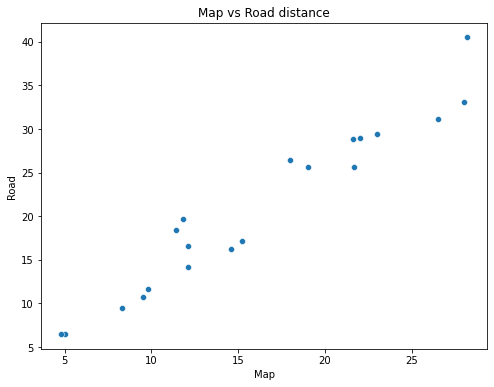

In [5]:
# plot the data
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=distance, x='Map', y='Road')
ax.set(title="Map vs Road distance")
plt.show()

In [6]:
# get covariance, correlation
cov, r = paired.cov, paired.corr_coeff
adt.PairedVarsRepr(cov, r)

pairedvars(cov=68.3383, r=0.9691)

## Association between two discrete variables

### Example: Tattoo removal

In [7]:
# get data
tatts = pdloader.get('tattoos')

In [8]:
# get series
gender = tatts["Gender"]
score = tatts["Score"]

In [9]:
# use relace to make gender labels more meaningful
pd.crosstab(
    index=gender.replace({'f': 'Females', 'm': 'Males'}),
    columns=score,
    margins=True)

Score,1,2,3,4,All
Gender,,,,,
Females,4,3,4,1,12
Males,10,11,7,15,43
All,14,14,11,16,55


We can view different types of probabilities by passing an argument for `normalize`.
See comments below for an explanation.

In [10]:
# view proprotion by total
pd.crosstab(
    index=gender.replace({'f': 'Females', 'm': 'Males'}),
    columns=score,
    normalize=True)

Score,1,2,3,4
Gender,,,,
Females,0.072727,0.054545,0.072727,0.018182
Males,0.181818,0.200000,0.127273,0.272727


In [11]:
# normalise column, use column marginal -> Pr(idx|col)
pd.crosstab(
    index=gender.replace({'f': 'Females', 'm': 'Males'}),
    columns=score,
    normalize='columns')

Score,1,2,3,4
Gender,,,,
Females,0.285714,0.214286,0.363636,0.0625
Males,0.714286,0.785714,0.636364,0.9375


In [12]:
# normalise index, use row marginal -> Pr(col|idx)
pd.crosstab(
    index=gender.replace({'f': 'Females', 'm': 'Males'}),
    columns=score,
    normalize='index')

Score,1,2,3,4
Gender,,,,
Females,0.333333,0.250000,0.333333,0.083333
Males,0.232558,0.255814,0.162791,0.348837
